In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVR
from sklearn import linear_model
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings("ignore")

In [104]:
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 0
    elif 6 <= month <= 8:
        return 1
    elif 9 <= month <= 11:
        return 2
    else:
        return 3

In [105]:
df_principal = pd.read_csv(r"seattle-weather.csv")
display(df_principal)
df_principal.info()
df_principal.describe()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [106]:
df_tratado = df_principal
df_tratado['date'] = pd.to_datetime(df_tratado['date'])
df_tratado['season'] = df_tratado['date'].apply(get_season)
# Removendo a coluna 'date'
df_tratado.drop(columns=['date'], inplace=True)

# Movendo a coluna 'season_encoded' para a primeira posição
cols = list(df_tratado.columns)
cols = ['season'] + [col for col in cols if col != 'season']
df_tratado = df_tratado[cols]


In [107]:
df_tratado

,season,precipitation,temp_max,temp_min,wind,weather
0,3,0.0,12.8,5.0,4.7,drizzle
1,3,10.9,10.6,2.8,4.5,rain
2,3,0.8,11.7,7.2,2.3,rain
3,3,20.3,12.2,5.6,4.7,rain
4,3,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,3,8.6,4.4,1.7,2.9,rain
1457,3,1.5,5.0,1.7,1.3,rain
1458,3,0.0,7.2,0.6,2.6,fog
1459,3,0.0,5.6,-1.0,3.4,sun


In [157]:
#atributos para ajudar com a predicao alvo
X = df_tratado.iloc[:,:-1]
#alvo modelo
y = df_tratado.iloc[:,-1]
#dividindo base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [177]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Criando o modelo de árvore de decisão
model = RandomForestClassifier()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo predições
predictions = model.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8444444444444444


In [178]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo os hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # número de árvores na floresta
    'max_features': ['auto', 'sqrt', 'log2'],  # número de features a considerar em cada split
    'max_depth': [10, 20, 30, 40, 50, None],  # profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # número mínimo de samples necessários para split de um nó
    'min_samples_leaf': [1, 2, 4],  # número mínimo de samples necessários em cada folha
    'bootstrap': [True, False]  # método de amostragem de instâncias (com substituição ou sem)
}

# Criando o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Realizando a busca aleatória
random_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros Encontrados:")
print(random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Melhores Hiperparâmetros Encontrados:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


In [187]:
# Criando um novo modelo RandomForestClassifier com os melhores hiperparâmetros encontrados
best_model = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features='log2', max_depth=30, bootstrap=True)

# Treinando o modelo com os dados de treinamento
best_model.fit(X_train, y_train)

# Fazendo previsões com o modelo otimizado
predictions = best_model.predict(X_test)

# Avaliando a acurácia do modelo otimizado
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do Modelo Otimizado:", accuracy)

# Imprimindo o relatório de classificação do modelo otimizado
from sklearn.metrics import classification_report
print('Relatório de Classificação do Modelo Otimizado:')
print(classification_report(y_test, predictions))


Acurácia do Modelo Otimizado: 0.852991452991453
Relatório de Classificação do Modelo Otimizado:
              precision    recall  f1-score   support

     drizzle       1.00      0.06      0.11        17
         fog       0.67      0.04      0.08        46
        rain       0.97      0.93      0.95       260
        snow       0.60      0.30      0.40        10
         sun       0.77      1.00      0.87       252

    accuracy                           0.85       585
   macro avg       0.80      0.47      0.48       585
weighted avg       0.85      0.85      0.81       585



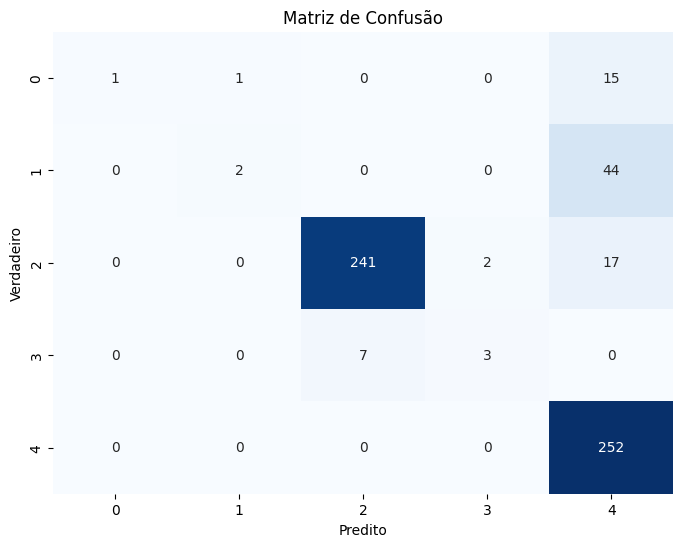

In [188]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


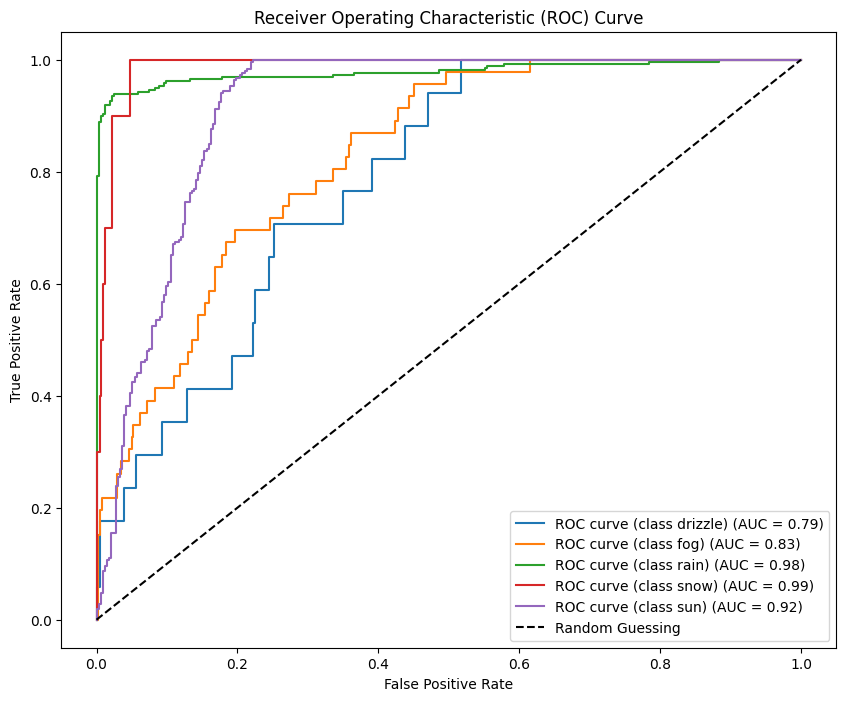

In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Converter rótulos de classe em representação binária
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Obter as probabilidades previstas para as classes positivas
y_prob = best_model.predict_proba(X_test)

# Calcular a curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {lb.classes_[i]}) (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


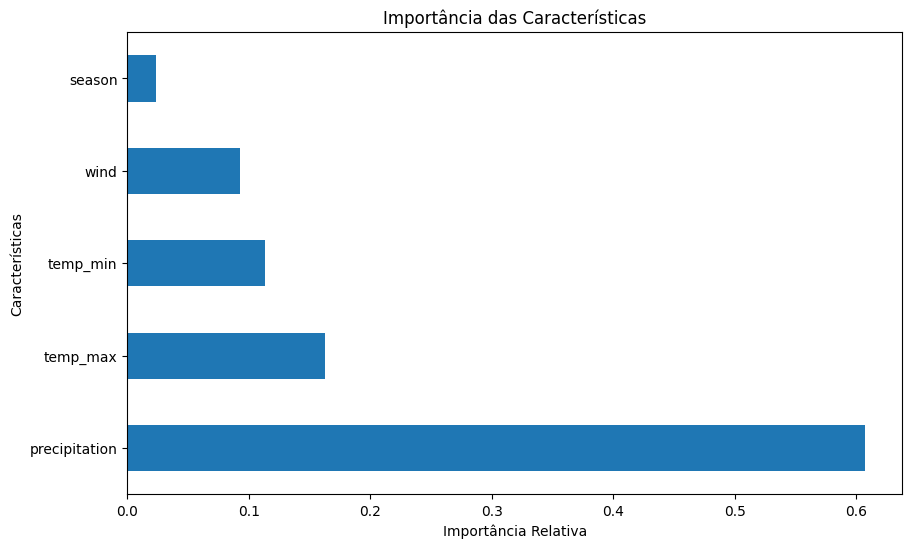

In [191]:
# Importância das Características
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Importância das Características')
plt.xlabel('Importância Relativa')
plt.ylabel('Características')
plt.show()